In [6]:
#Bai1
import pandas as pd
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
import numpy as np

#Doc du lieu iris tu uci hoac tu scikit-learn
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
columns = ["Petal Length", "Petal Width", "Sepal Length", "Sepal Width"];
X = pd.DataFrame(iris.data, columns = columns)
y = iris.target
print(X.describe())

#Su dung nghi thuc kiem tra hold-out
#Chia du lieu ngau nhien thanh 2 tap du lieu con
#training set va test set theo ti le 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)
# print(X_train.head())

#Xay dung bagging cua 50 cay quyet dinh
model = BaggingClassifier(estimator=tree.DecisionTreeClassifier(), n_estimators=50)
model.fit(X_train, y_train)

#Du doan nhan tap kiem tra
prediction = model.predict(X_test)
# print(prediction)

#Tinh do chinh xac
print("Do chinh xác cua mo hinh voi nghi thuc kiem tra hold-out: %.3f" %model.score(X_test, y_test))

#Su dung nghi thuc kiem tra cheo k-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Thuc hien nghi thuc kiem tra 5 fold
nFold=5
model = BaggingClassifier(estimator=tree.DecisionTreeClassifier(), n_estimators=50)
scores = cross_val_score(model, X, y, cv=nFold)
print("Do chinh xac cua mo hinh voi nghi thuc kiem tra {:d}-fold: {:0.2f}(+/- {:0.2f})".format(nFold, scores.mean(), scores.std()))

       Petal Length  Petal Width  Sepal Length  Sepal Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
Do chinh xác cua mo hinh voi nghi thuc kiem tra hold-out: 0.933
Do chinh xac cua mo hinh voi nghi thuc kiem tra 5-fold: 0.96(+/- 0.03)


In [7]:
#Bai2
import pandas as pd
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
import numpy as np

#Doc du lieu
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
columns=["Petal Length","Petal Width","Sepal Length","Sepal Width"];
X = pd.DataFrame(iris.data, columns=columns)
y = iris.target
print(X.describe())

#Su dung nghi thuc kiem tra hold-out
#Chia du lieu ngau nhien thanh 2 tap du lieu con
#training set va test set theo ti le 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Xay dung boosting cua 50 cay quyet dinh, cay co do sau toi da la 3
model = AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(max_depth=1),n_estimators=50)
model.fit(X_train, y_train)

# Du doan nhan tap kiem tra
y_pred = model.predict(X_test)

#Danh gia mo hinh bang chi so RMSE (Root Mean Squared Error)
from sklearn import metrics
print('Gia tri Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_test, y_pred))
print('Gia tri Mean Squared Error: %.3f' % metrics.mean_squared_error(y_test, y_pred))
print('Gia tri Root Mean Squared Error: %.3f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

       Petal Length  Petal Width  Sepal Length  Sepal Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
Gia tri Mean Absolute Error: 0.067
Gia tri Mean Squared Error: 0.067
Gia tri Root Mean Squared Error: 0.258


       Petal Length  Petal Width  Sepal Length  Sepal Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
Do chinh xác cua mo hinh voi nghi thuc kiem tra hold-out: 0.889


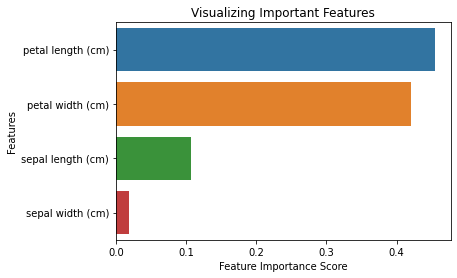

In [15]:
#Bai3
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np

#Doc du lieu
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
columns=["Petal Length","Petal Width","Sepal Length","Sepal Width"];
df = pd.DataFrame(iris.data, columns=columns)
y = iris.target
print(df.describe())

# Su dung nghi thuc kiem tra hold-out
#Chia du lieu ngau nhien thanh 2 tap du lieu con
#training set va test set theo ti le 70/30
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3)

# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)
# print(X_train.head())

#Xay dung mo hinh rung ngau nhien voi 100 cay quyet dinh
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

#Du doan nhan tap kiem tra
y_pred = model.predict(X_test)
#print(prediction)

#Tinh do chinh xac
from sklearn import metrics
print("Do chinh xác cua mo hinh voi nghi thuc kiem tra hold-out: %.3f" % metrics.accuracy_score(y_test, y_pred))

#Tim cac thuoc tinh quan trong
feature_importances = pd.Series(model.feature_importances_,index=iris.feature_names).sort_values(ascending=False)

#Hien thi tam quan trong cua cac thuoc tinh

import matplotlib.pyplot as plt
import seaborn as sns

#Ve bieu do
sns.barplot(x=feature_importances, y=feature_importances.index)

#Gan nhan truc tung va truc hoanh
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

# plt.legend()
plt.show()



In [23]:
#Bai4.1
import pandas as pd
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
import numpy as np

#Doc du lieu iris tu uci hoac tu scikit-learn
from sklearn import datasets
from sklearn.model_selection import train_test_split

wine = datasets.load_wine()
columns = [];
X = pd.DataFrame(wine.data, columns = wine['feature_names'])
y = wine.target
print(X.describe())

#Su dung nghi thuc kiem tra hold-out
#Chia du lieu ngau nhien thanh 2 tap du lieu con
#training set va test set theo ti le 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)
# print(X_train.head())

#Xay dung bagging cua 50 cay quyet dinh
model = BaggingClassifier(estimator=tree.DecisionTreeClassifier(), n_estimators=50)
model.fit(X_train, y_train)

#Du doan nhan tap kiem tra
prediction = model.predict(X_test)
# print(prediction)

#Tinh do chinh xac
print("Do chinh xác cua mo hinh voi nghi thuc kiem tra hold-out: %.3f" %model.score(X_test, y_test))

#Su dung nghi thuc kiem tra cheo k-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Thuc hien nghi thuc kiem tra 5 fold
nFold=5
model = BaggingClassifier(estimator=tree.DecisionTreeClassifier(), n_estimators=50)
scores = cross_val_score(model, X, y, cv=nFold)
print("Do chinh xac cua mo hinh voi nghi thuc kiem tra {:d}-fold: {:0.2f}(+/- {:0.2f})".format(nFold, scores.mean(), scores.std()))

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

In [27]:
#Bai4.2
import pandas as pd
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
import numpy as np

#Doc du lieu iris tu uci hoac tu scikit-learn
from sklearn import datasets
from sklearn.model_selection import train_test_split

breast_cancer = datasets.load_breast_cancer()
columns = [];
X = pd.DataFrame(breast_cancer.data, columns = breast_cancer['feature_names'])
y = breast_cancer.target
print(X.describe())

#Su dung nghi thuc kiem tra hold-out
#Chia du lieu ngau nhien thanh 2 tap du lieu con
#training set va test set theo ti le 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)
# print(X_train.head())

#Xay dung bagging cua 50 cay quyet dinh
model = BaggingClassifier(estimator=tree.DecisionTreeClassifier(), n_estimators=50)
model.fit(X_train, y_train)

#Du doan nhan tap kiem tra
prediction = model.predict(X_test)
# print(prediction)

#Tinh do chinh xac
print("Do chinh xác cua mo hinh voi nghi thuc kiem tra hold-out: %.3f" %model.score(X_test, y_test))

#Su dung nghi thuc kiem tra cheo k-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Thuc hien nghi thuc kiem tra 5 fold
nFold=5
model = BaggingClassifier(estimator=tree.DecisionTreeClassifier(), n_estimators=50)
scores = cross_val_score(model, X, y, cv=nFold)
print("Do chinh xac cua mo hinh voi nghi thuc kiem tra {:d}-fold: {:0.2f}(+/- {:0.2f})".format(nFold, scores.mean(), scores.std()))

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [35]:

#Bai4.3
import pandas as pd
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
import numpy as np

#Doc du lieu iris tu uci hoac tu scikit-learn
from sklearn import datasets
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
columns = [];
X = pd.DataFrame(digits.data, columns = digits['feature_names'])
y = digits.target
print(X.describe())

#Su dung nghi thuc kiem tra hold-out
#Chia du lieu ngau nhien thanh 2 tap du lieu con
#training set va test set theo ti le 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)
# print(X_train.head())

#Xay dung bagging cua 50 cay quyet dinh
model = BaggingClassifier(estimator=tree.DecisionTreeClassifier(), n_estimators=50)
model.fit(X_train, y_train)

#Du doan nhan tap kiem tra
prediction = model.predict(X_test)
# print(prediction)

#Tinh do chinh xac
print("Do chinh xác cua mo hinh voi nghi thuc kiem tra hold-out: %.3f" %model.score(X_test, y_test))

#Su dung nghi thuc kiem tra cheo k-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Thuc hien nghi thuc kiem tra 5 fold
nFold=5
model = BaggingClassifier(estimator=tree.DecisionTreeClassifier(), n_estimators=50)
scores = cross_val_score(model, X, y, cv=nFold)
print("Do chinh xac cua mo hinh voi nghi thuc kiem tra {:d}-fold: {:0.2f}(+/- {:0.2f})".format(nFold, scores.mean(), scores.std()))


       pixel_0_0    pixel_0_1    pixel_0_2    pixel_0_3    pixel_0_4  \
count     1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean         0.0     0.303840     5.204786    11.835838    11.848080   
std          0.0     0.907192     4.754826     4.248842     4.287388   
min          0.0     0.000000     0.000000     0.000000     0.000000   
25%          0.0     0.000000     1.000000    10.000000    10.000000   
50%          0.0     0.000000     4.000000    13.000000    13.000000   
75%          0.0     0.000000     9.000000    15.000000    15.000000   
max          0.0     8.000000    16.000000    16.000000    16.000000   

         pixel_0_5    pixel_0_6    pixel_0_7    pixel_1_0    pixel_1_1  ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...   
min       0.000000     0.000000    

In [47]:
#Bai5.1
import pandas as pd
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
import numpy as np

#Doc du lieu
from sklearn import datasets
from sklearn.model_selection import train_test_split
breast_cancer = datasets.load_breast_cancer()
columns=[];
X = pd.DataFrame(breast_cancer.data, columns= breast_cancer['feature_names'])
y = breast_cancer.target
print(X.describe())

#Su dung nghi thuc kiem tra hold-out
#Chia du lieu ngau nhien thanh 2 tap du lieu con
#training set va test set theo ti le 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Xay dung boosting cua 50 cay quyet dinh, cay co do sau toi da la 3
model = AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(max_depth=1),n_estimators=50)
model.fit(X_train, y_train)

# Du doan nhan tap kiem tra
y_pred = model.predict(X_test)

# Sử dụng nghi thức kiểm tra chéo k-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Thực hiện nghi thức kiểm tra 5 fold
nFold = 5;
model = AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(),n_estimators=50)
scores = cross_val_score(model, X, y, cv=nFold)
print("Do chinh xac cua mo hinh voi nghi thuc kiem tra {:d}-fold: {:0.2f}(+/- {:0.2f})".format(nFold, scores.mean(), scores.std()))

#Danh gia mo hinh bang chi so RMSE (Root Mean Squared Error)
from sklearn import metrics
print('Gia tri Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_test, y_pred))
print('Gia tri Mean Squared Error: %.3f' % metrics.mean_squared_error(y_test, y_pred))
print('Gia tri Root Mean Squared Error: %.3f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [45]:
#Bai5.2
import pandas as pd
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
import numpy as np

#Doc du lieu
from sklearn import datasets
from sklearn.model_selection import train_test_split
wine = datasets.load_wine()
columns=[];
X = pd.DataFrame(wine.data, columns= wine['feature_names'])
y = wine.target
print(X.describe())

#Su dung nghi thuc kiem tra hold-out
#Chia du lieu ngau nhien thanh 2 tap du lieu con
#training set va test set theo ti le 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Xay dung boosting cua 50 cay quyet dinh, cay co do sau toi da la 3
model = AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(max_depth=1),n_estimators=50)
model.fit(X_train, y_train)

# Du doan nhan tap kiem tra
y_pred = model.predict(X_test)

# Sử dụng nghi thức kiểm tra chéo k-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Thực hiện nghi thức kiểm tra 5 fold
nFold = 5;
model = AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(),n_estimators=50)
scores = cross_val_score(model, X, y, cv=nFold)
print("Do chinh xac cua mo hinh voi nghi thuc kiem tra {:d}-fold: {:0.2f}(+/- {:0.2f})".format(nFold, scores.mean(), scores.std()))

#Danh gia mo hinh bang chi so RMSE (Root Mean Squared Error)
from sklearn import metrics
print('Gia tri Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_test, y_pred))
print('Gia tri Mean Squared Error: %.3f' % metrics.mean_squared_error(y_test, y_pred))
print('Gia tri Root Mean Squared Error: %.3f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

In [46]:
#Bai5.3
import pandas as pd
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
import numpy as np

#Doc du lieu
from sklearn import datasets
from sklearn.model_selection import train_test_split
digits = datasets.load_digits()
columns=[];
X = pd.DataFrame(digits.data, columns= digits['feature_names'])
y = digits.target
print(X.describe())

#Su dung nghi thuc kiem tra hold-out
#Chia du lieu ngau nhien thanh 2 tap du lieu con
#training set va test set theo ti le 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Xay dung boosting cua 50 cay quyet dinh, cay co do sau toi da la 3
model = AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(max_depth=1),n_estimators=50)
model.fit(X_train, y_train)

# Du doan nhan tap kiem tra
y_pred = model.predict(X_test)

# Sử dụng nghi thức kiểm tra chéo k-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Thực hiện nghi thức kiểm tra 5 fold
nFold = 5;
model = AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(),n_estimators=50)
scores = cross_val_score(model, X, y, cv=nFold)
print("Do chinh xac cua mo hinh voi nghi thuc kiem tra {:d}-fold: {:0.2f}(+/- {:0.2f})".format(nFold, scores.mean(), scores.std()))

#Danh gia mo hinh bang chi so RMSE (Root Mean Squared Error)
from sklearn import metrics
print('Gia tri Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_test, y_pred))
print('Gia tri Mean Squared Error: %.3f' % metrics.mean_squared_error(y_test, y_pred))
print('Gia tri Root Mean Squared Error: %.3f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

       pixel_0_0    pixel_0_1    pixel_0_2    pixel_0_3    pixel_0_4  \
count     1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean         0.0     0.303840     5.204786    11.835838    11.848080   
std          0.0     0.907192     4.754826     4.248842     4.287388   
min          0.0     0.000000     0.000000     0.000000     0.000000   
25%          0.0     0.000000     1.000000    10.000000    10.000000   
50%          0.0     0.000000     4.000000    13.000000    13.000000   
75%          0.0     0.000000     9.000000    15.000000    15.000000   
max          0.0     8.000000    16.000000    16.000000    16.000000   

         pixel_0_5    pixel_0_6    pixel_0_7    pixel_1_0    pixel_1_1  ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...   
min       0.000000     0.000000    

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

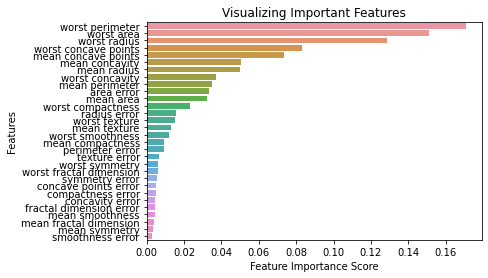

In [41]:
#Bai6.1
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np

#Doc du lieu
from sklearn import datasets
from sklearn.model_selection import train_test_split
breast_cancer = datasets.load_breast_cancer()
columns=[];
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer['feature_names'])
y = breast_cancer.target
print(df.describe())

# Su dung nghi thuc kiem tra hold-out
#Chia du lieu ngau nhien thanh 2 tap du lieu con
#training set va test set theo ti le 70/30
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3)

# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)
# print(X_train.head())

#Xay dung mo hinh rung ngau nhien voi 100 cay quyet dinh
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

#Du doan nhan tap kiem tra
y_pred = model.predict(X_test)
#print(prediction)

#Tinh do chinh xac
from sklearn import metrics
print("Do chinh xác cua mo hinh voi nghi thuc kiem tra hold-out: %.3f" % metrics.accuracy_score(y_test, y_pred))

#Tim cac thuoc tinh quan trong
feature_importances = pd.Series(model.feature_importances_,index=breast_cancer.feature_names).sort_values(ascending=False)

#Hien thi tam quan trong cua cac thuoc tinh

import matplotlib.pyplot as plt
import seaborn as sns

#Ve bieu do
sns.barplot(x=feature_importances, y=feature_importances.index)

#Gan nhan truc tung va truc hoanh
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

# plt.legend()
plt.show()



          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

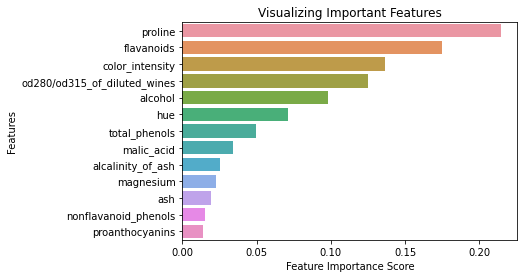

In [42]:
#Bai6.2
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np

#Doc du lieu
from sklearn import datasets
from sklearn.model_selection import train_test_split
wine = datasets.load_wine()
columns=[];
df = pd.DataFrame(wine.data, columns=wine['feature_names'])
y = wine.target
print(df.describe())

# Su dung nghi thuc kiem tra hold-out
#Chia du lieu ngau nhien thanh 2 tap du lieu con
#training set va test set theo ti le 70/30
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3)

# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)
# print(X_train.head())

#Xay dung mo hinh rung ngau nhien voi 100 cay quyet dinh
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

#Du doan nhan tap kiem tra
y_pred = model.predict(X_test)
#print(prediction)

#Tinh do chinh xac
from sklearn import metrics
print("Do chinh xác cua mo hinh voi nghi thuc kiem tra hold-out: %.3f" % metrics.accuracy_score(y_test, y_pred))

#Tim cac thuoc tinh quan trong
feature_importances = pd.Series(model.feature_importances_,index=wine.feature_names).sort_values(ascending=False)

#Hien thi tam quan trong cua cac thuoc tinh

import matplotlib.pyplot as plt
import seaborn as sns

#Ve bieu do
sns.barplot(x=feature_importances, y=feature_importances.index)

#Gan nhan truc tung va truc hoanh
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

# plt.legend()
plt.show()



       pixel_0_0    pixel_0_1    pixel_0_2    pixel_0_3    pixel_0_4  \
count     1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean         0.0     0.303840     5.204786    11.835838    11.848080   
std          0.0     0.907192     4.754826     4.248842     4.287388   
min          0.0     0.000000     0.000000     0.000000     0.000000   
25%          0.0     0.000000     1.000000    10.000000    10.000000   
50%          0.0     0.000000     4.000000    13.000000    13.000000   
75%          0.0     0.000000     9.000000    15.000000    15.000000   
max          0.0     8.000000    16.000000    16.000000    16.000000   

         pixel_0_5    pixel_0_6    pixel_0_7    pixel_1_0    pixel_1_1  ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...   
min       0.000000     0.000000    

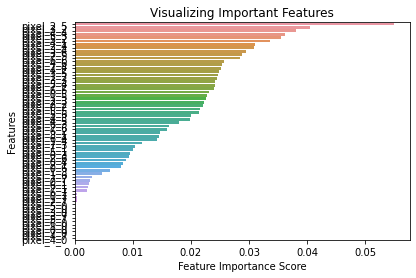

In [43]:
#Bai6.3
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np

#Doc du lieu
from sklearn import datasets
from sklearn.model_selection import train_test_split
digits = datasets.load_digits()
columns=[];
df = pd.DataFrame(digits.data, columns=digits['feature_names'])
y = digits.target
print(df.describe())

# Su dung nghi thuc kiem tra hold-out
#Chia du lieu ngau nhien thanh 2 tap du lieu con
#training set va test set theo ti le 70/30
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3)

# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)
# print(X_train.head())

#Xay dung mo hinh rung ngau nhien voi 100 cay quyet dinh
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

#Du doan nhan tap kiem tra
y_pred = model.predict(X_test)
#print(prediction)

#Tinh do chinh xac
from sklearn import metrics
print("Do chinh xác cua mo hinh voi nghi thuc kiem tra hold-out: %.3f" % metrics.accuracy_score(y_test, y_pred))

#Tim cac thuoc tinh quan trong
feature_importances = pd.Series(model.feature_importances_,index=digits.feature_names).sort_values(ascending=False)

#Hien thi tam quan trong cua cac thuoc tinh

import matplotlib.pyplot as plt
import seaborn as sns

#Ve bieu do
sns.barplot(x=feature_importances, y=feature_importances.index)

#Gan nhan truc tung va truc hoanh
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

# plt.legend()
plt.show()

